#### Linear regressor

Linear regression refers to finding the underlying function with the help of linear combination of input variables. A simple linear regression is easy to understand, but represents the basis of regression techniques. Once these concepts are understood, it will be easier for us to address the other types of regression.

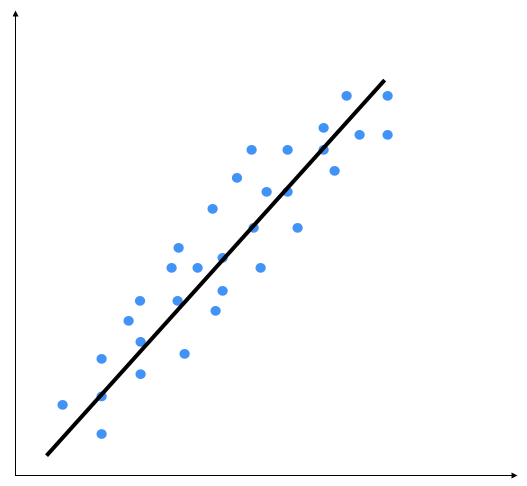

In [7]:
from IPython.display import Image
Image(filename='./images/lr.png', width=200,height=200) 

<p style="color:blue;">The linear regression method consists of precisely identifying a line that is capable of representing point distribution in a two-dimensional plane, that is, if the points corresponding to the observations are near the line, then the chosen model will be able to describe the link between the variables effectively. </p>

In theory, there are an infinite number of lines that may approximate the observations, while in practice, there is only one mathematical model that optimizes the representation of the data. In the case of a linear mathematical relationship, the observations of the y variable can be obtained by a linear function of the observations of the x variable.

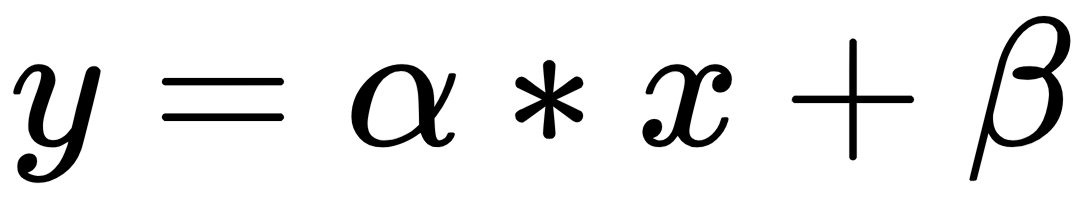

In [8]:
from IPython.display import Image
Image(filename='./images/lr1.png', width=100,height=100) 

In the preceding formula, x is the explanatory variable and y is the response variable. The α and β parameters, which represent the slope of the line and the intercept with the y-axis respectively, must be estimated based on the observations collected for the two variables included in the model.<br><br>

The slope, α, is of particular interest, that is, the variation of the mean response for every single increment of the explanatory variable. What about a change in this coefficient? If the slope is positive, the regression line increases from left to right, and if the slope is negative, the line decreases from left to right. When the slope is zero, the explanatory variable has no effect on the value of the response. But it is not just the sign of α that establishes the weight of the relationship between the variables. More generally, its value is also important. In the case of a positive slope, the mean response is higher when the explanatory variable is higher, while in the case of a negative slope, the mean response is lower when the explanatory variable is higher.<br><br>

The main aim of linear regression is to get the underlying linear model that connects the input variable to the output variable. This in turn reduces the sum of squares of differences between the actual output and the predicted output using a linear function. This method is called ordinary least squares. In this method, the coefficients are estimated by determining numerical values that minimize the sum of the squared deviations between the observed responses and the fitted responses, according to the following equation:<br><br>

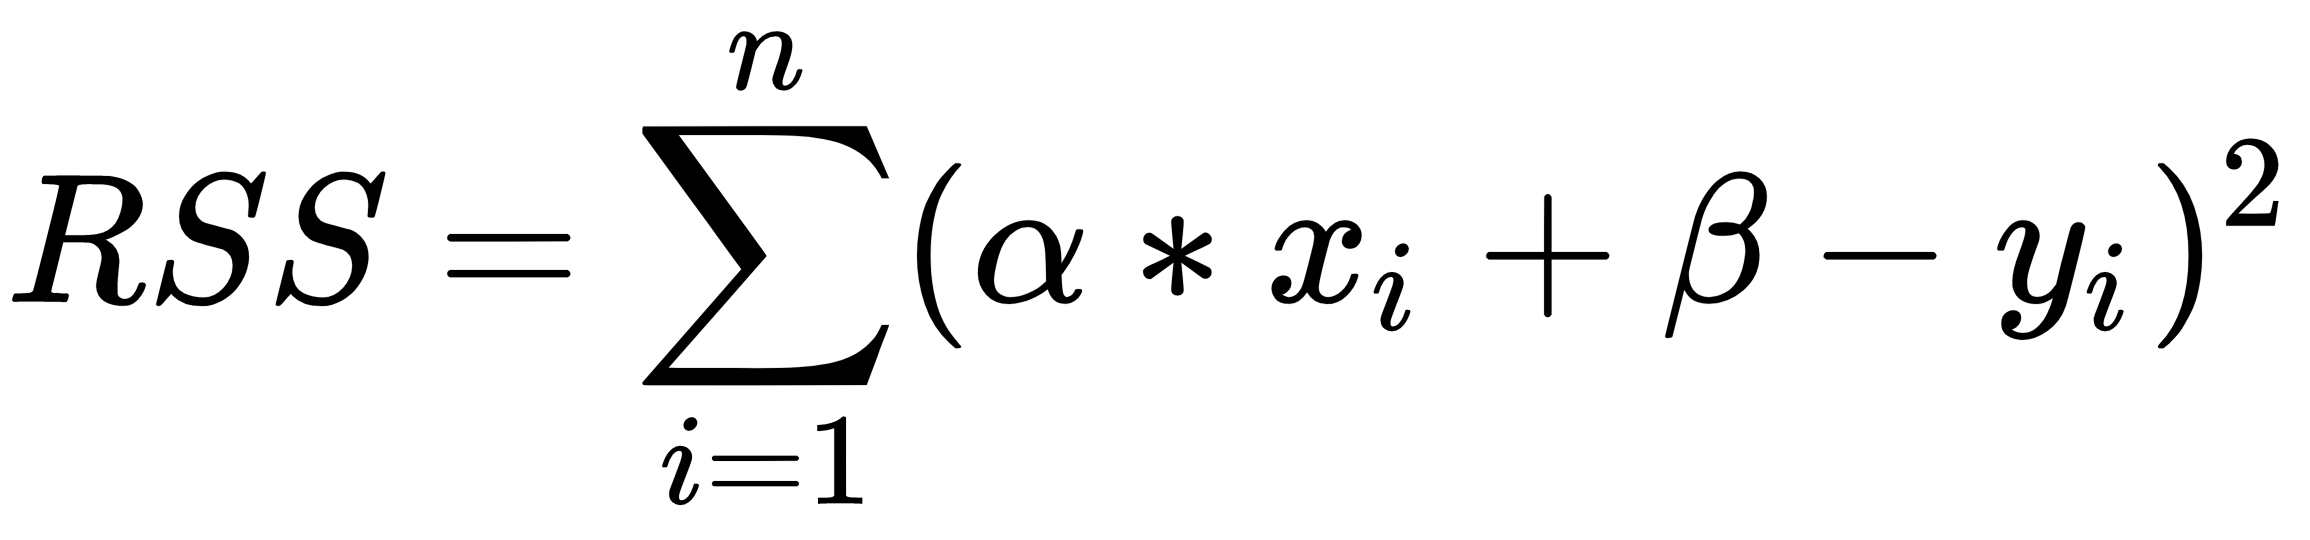

In [9]:
from IPython.display import Image
Image(filename='./images/r2.png', width=200,height=200) 

This quantity represents the sum of the squares of the distances to each experimental datum (xi, yi) from the corresponding point on the straight line.

You might say that there might be a curvy line out there that fits these points better, but linear regression doesn't allow this. The main advantage of linear regression is that it's not complex. If you go into non-linear regression, you may get more accurate models, but they will be slower. As shown in the preceding diagram, the model tries to approximate the input data points using a straight line. 

<p style="color:blue;">Regression is used to find out the relationship between input data and the continuously-valued output data. This is generally represented as real numbers, and our aim is to estimate the core function that calculates the mapping from the input to the output. </p>

In [12]:
filename = "./datasets/VehiclesItaly.txt"

In [13]:
X = []
y = []
with open(filename,'r') as f:
    for line in f.readlines():
        xt,yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

In [14]:
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

In [15]:
import numpy as np

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

In [16]:
from sklearn import linear_model
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)
y_train_pred = linear_regressor.predict(X_train)

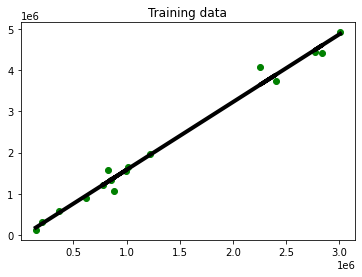

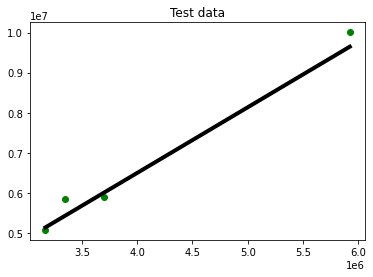

In [17]:
# Plot outputs
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

y_test_pred = linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.show()

In [18]:
# Measure performance
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98


In [23]:
# Model persistence
import pickle

output_model_file = "./models/3_model_linear_regr.pkl"

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

In [24]:
with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

y_test_pred_new = model_linregr.predict(X_test)
print("New mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2)) 

New mean absolute error = 241907.27


In [21]:
y_test_pred_new = model_linregr.predict(X_test)
print("New mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2)) 

New mean absolute error = 241907.27


- <b>Mean absolute error:</b> This is the average of absolute errors of all the data points in the given dataset.
- <b>Mean squared error: </b>This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!
- <b> Median absolute error:</b> This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.
- <b>Explained variance score:</b> This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.
- <b>R2 score: </b>This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.